In [1]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [10]:
# bigram: one character given, which is next?

In [24]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [25]:
import torch

In [27]:
a = torch.zeros((3, 5), dtype = torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [107]:
N = torch.zeros((27,27), dtype=torch.int32)

In [64]:
chars = sorted(list(set(''.join(words))))
chars

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0

itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [108]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

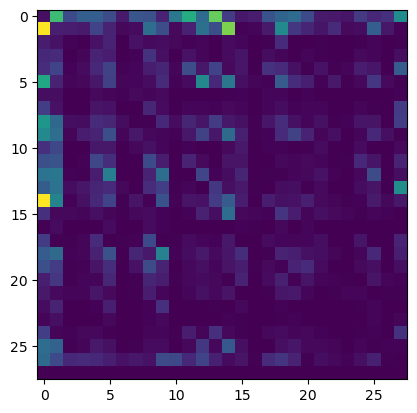

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

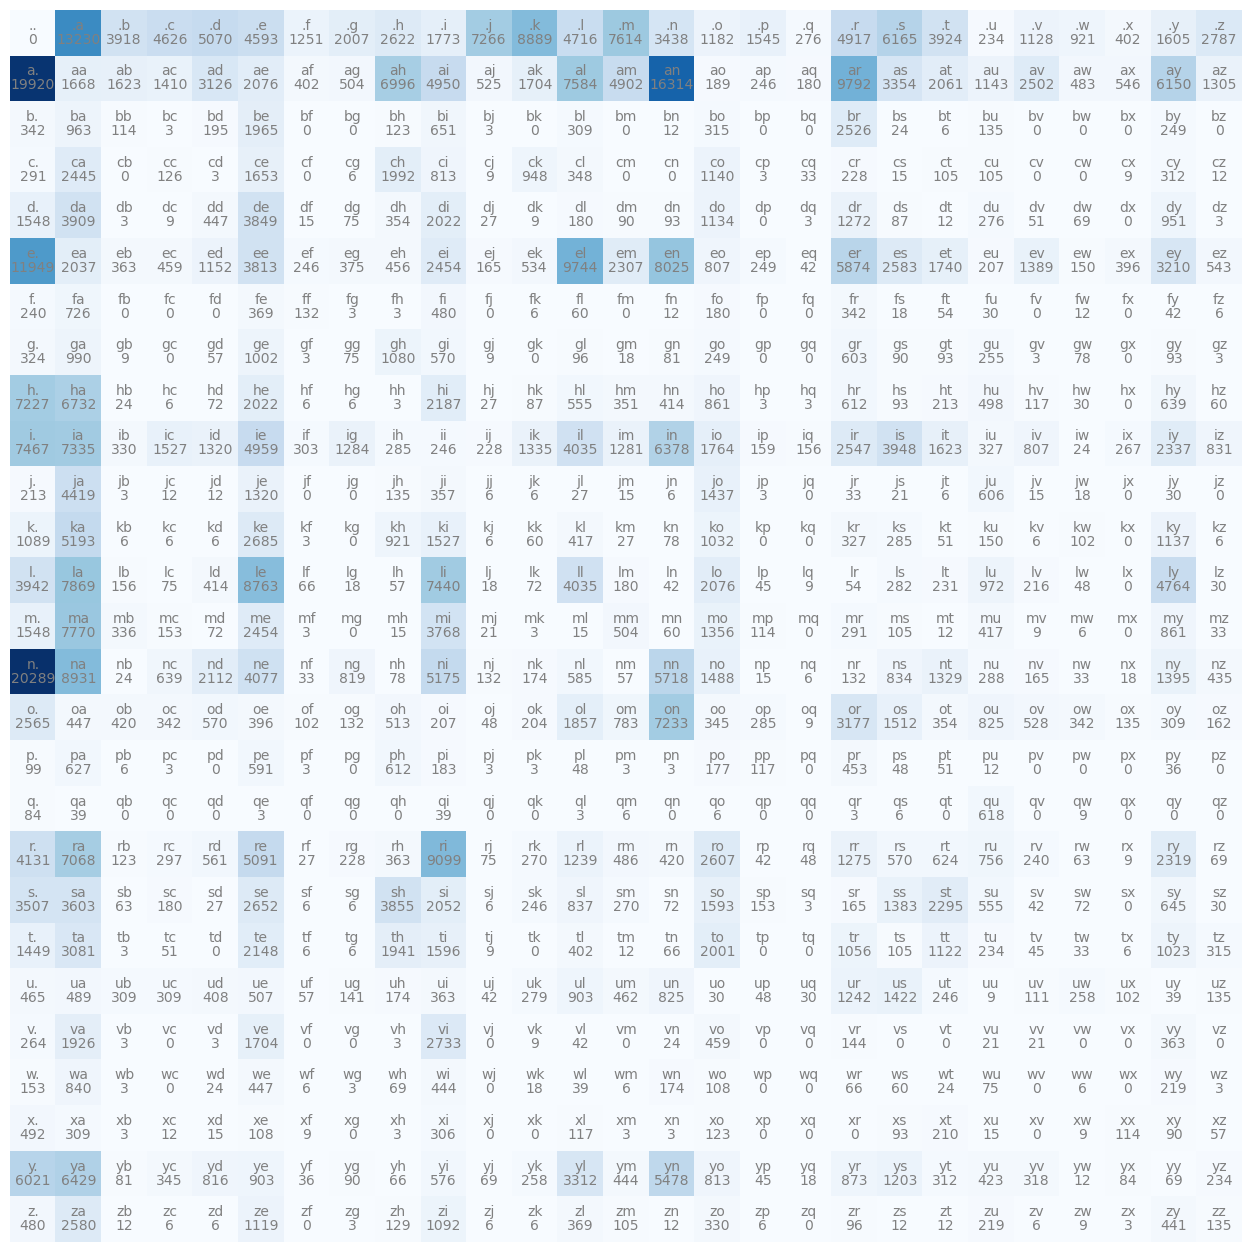

In [68]:
plt.figure(figsize = [16,16])
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off');

In [85]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [94]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item()
itos[ix]

't'

In [322]:
#P = (N+1).float()
P = (N).float()
P /= P.sum(1, keepdim=True)
P[0].sum()

tensor(1.)

In [118]:
P.sum(1).shape

torch.Size([27])

In [323]:
for i in range(20):
    ix = 0
    out = []
    while True:
        p = P[ix]
        #p = N[ix].float()
        #p = p / p.sum()
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.
zem.
deru.
firit.
gaikajahahbevare.


In [146]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
nll/n=tensor(2.4544)


In [148]:
# Part 2: Neural network approach
# that's basically a tokenizer
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs) # we want integers.
ys = torch.tensor(ys)

tensor([ 0,  5, 13, 13,  1])

In [154]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.dtype

torch.float32

In [166]:
W = torch.randn((27, 27))

In [169]:

xenc @ W # (5, 27) @ (27, 27) -> (5, 27)
# linear layer, no biasses, no output non-linearity
# log counts

logits = (xenc @ W).exp() # log counts, loschits, not log-its
counts = logits.exp() # though not integers at this point
probs = counts / counts.sum(1, keepdims = True) # softmax


In [172]:
# Optimization

xs

tensor([ 0,  5, 13, 13,  1])

In [173]:
ys

tensor([ 5, 13, 13,  1,  0])

In [187]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad=True)

In [210]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()
print(loss.item())

3.6295523643493652


In [211]:
# backward
W.grad = None # set gradients to zero
loss.backward()

In [212]:
W.data += -0.1 * W.grad

In [316]:
## His summary
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad=True)

number of examples:  228146


In [320]:
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims = True)
    loss = -probs[torch.arange(num), ys].log().mean()#  + 0.01*(W**2).mean()
    
    
    # backward pass
    W.grad = None
    loss.backward()
    
    # update
    W.data += - 50* W.grad

print(loss.item())

2.4593088626861572


In [325]:
# sampling
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        
        
        ix = torch.multinomial(p, num_samples=1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
eniaviyny.
fobspehinivenvtahlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
